In [4]:
%load_ext autoreload
%autoreload 2

import sys
import os

# Add project root to Python path
root_dir = os.path.abspath(os.path.join(os.getcwd(), '..'))
if root_dir not in sys.path:
    sys.path.insert(0, root_dir)

In [5]:
from src.agents.worker import create_worker
from IPython.display import Image, display
from dotenv import load_dotenv

load_dotenv()

worker_agent = await create_worker(server_name="mouse")
#display(Image(worker_agent.get_graph().draw_mermaid_png()))

In [6]:
resp = await worker_agent.ainvoke({
    "task": "Click on 10 of clubs and 10 of hearts",
    "history_limit": 15,
    "max_recursions": 5
})

resp["result"]

{'success': False, 'reason': 'max_iterations'}

{'task': 'Click on select button. It is finished when you reach the hand gameplay screen',
 'last_screenshot': HumanMessage(content=[{'type': 'text', 'text': ' Current game state:'}, {'type': 'image_url', 'image_url': {'url': ''}}], additional_kwargs={}, response_metadata={}),
 'screen_descriptions': ['The screen is completely black with no visible UI elements, indicating the game is either loading, has crashed, or is not displaying any content. No actionable elements are present.'],
 'consecutive_duplicates': 0,
 'history_limit': 15,
 'ai_message': AIMessage(content='CURRENT STATE: The screen is completely black with no visible UI elements. There is no "select" button or any other actionable element present.\nTASK PROGRESS: My task is to click the select button and reach the hand gameplay screen, but there is nothing to interact with at this moment.\nSCREEN HISTORY: This matches the previous description; it\'s the first screen and it\'s not actionable.\nNEXT ACTION: I cannot proceed u
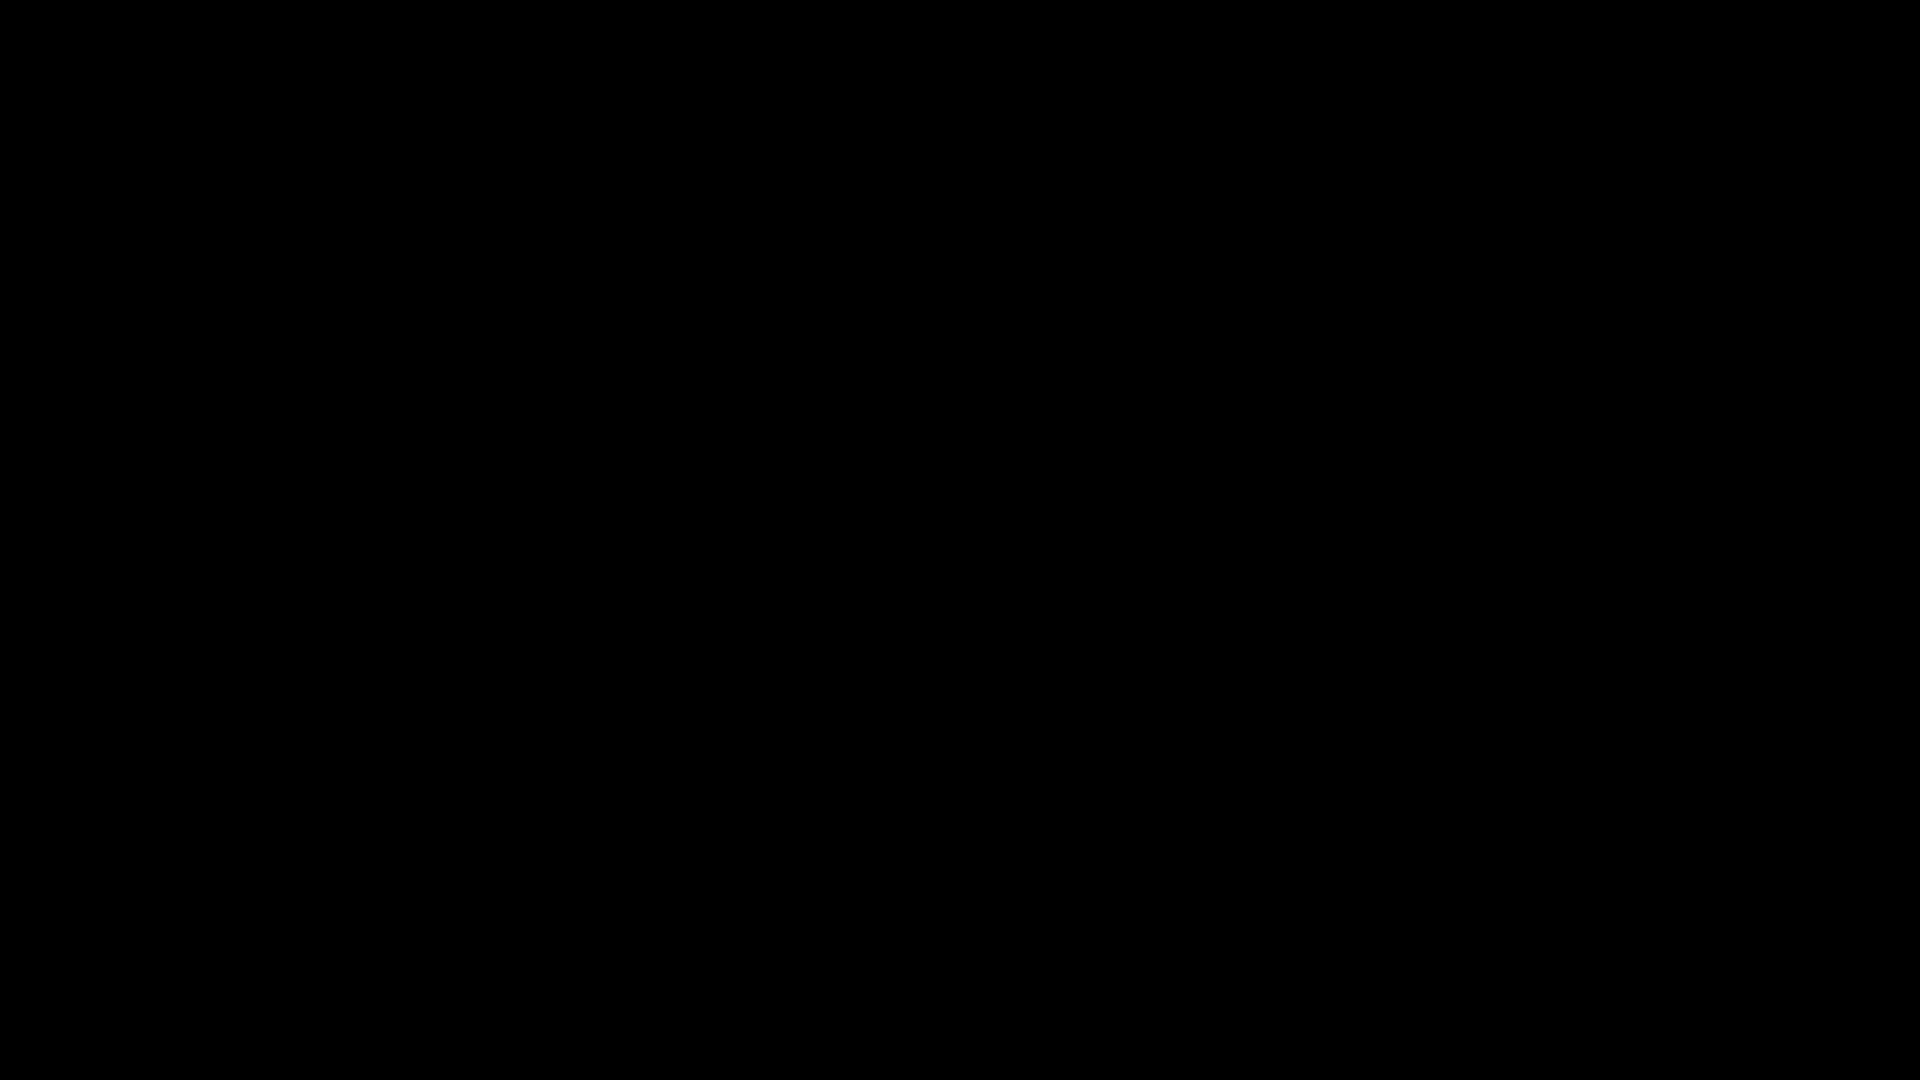

In [4]:
resp

In [ ]:
# Prueba con límites más estrictos
resp = await worker_agent.ainvoke({
    "task": "Click on any visible button",
    "history_limit": 5,
    "max_recursions": 3
})

resp["result"]


=== WORKER LLM INPUT (Iteration 1) ===
Total messages: 3 (System + 0 history + Task + Screenshot)
Message 2: HumanMessage
  Content: {
  "task": "Click on any visible button",
  "all_screen_descriptions": [
    "The game is in a blin...

Message 3: HumanMessage
  Text:  Current game state:
  Image: [screenshot data]

=== END LLM INPUT ===

=== WORKER LLM OUTPUT (Iteration 1) ===
Content: CURRENT STATE: I see the blind selection menu with visible actionable buttons: "Select" (for Small Blind) and "Skip Blind". There are also other buttons like "Run Info" and "Options" on the left panel.
TASK PROGRESS: My task is to click on any visible button. Multiple buttons are available.
SCREEN HISTORY: This is the first screen, no duplicates.
NEXT ACTION: I should locate a visible button and click it. I will choose the "Select" button for Small Blind as it is prominent and actionable.

Calling locate_element to find the "Select button".
Tool calls: 1
  1. locate_element({'description': 'Select but

{'success': False, 'reason': 'max_iterations'}